# Linear Regression

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,50)
y = x + np.random.normal(0,1,50)

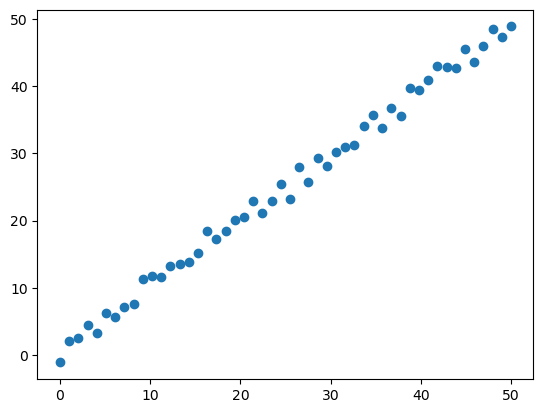

In [3]:
plt.scatter(x, y)

In [4]:
epochs = 10
learning_rate = 0.001

In [5]:
W = tf.Variable(0.)
b = tf.Variable(0.)

In [6]:
def linear_regression(x):
	y = W * x + b
	return y

In [7]:
def MSE(y_pred, y_true):
	return tf.reduce_mean(tf.square(y_pred - y_true))

In [8]:
tf.GradientTape()

In [9]:
for epoch in range(epochs):

	with tf.GradientTape() as tape:   # tf.GradientTape() : 자동 미분 기능
		y_pred = linear_regression(x)
		cost = MSE(y_pred, y)
	
	W_grad, b_grad = tape.gradient(cost, [W,b])
	
	W.assign_sub(W_grad * learning_rate)
	b.assign_sub(b_grad * learning_rate)

	print(f"[Epoch {epoch+1}] loss value: {cost.numpy()}")

[Epoch 1] loss value: 827.5635986328125
[Epoch 2] loss value: 389.1485290527344
[Epoch 3] loss value: 183.33749389648438
[Epoch 4] loss value: 86.72111511230469
[Epoch 5] loss value: 41.36516571044922
[Epoch 6] loss value: 20.073102951049805
[Epoch 7] loss value: 10.077661514282227
[Epoch 8] loss value: 5.385336875915527
[Epoch 9] loss value: 3.1825170516967773
[Epoch 10] loss value: 2.1483733654022217


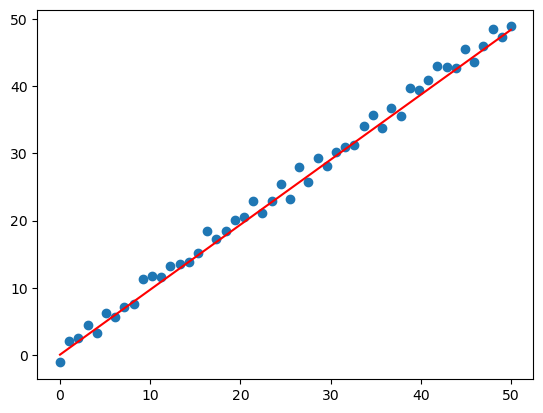

In [10]:
plt.scatter(x,y)
plt.plot(x, linear_regression(x), "r")
plt.show()

# Tensorflow with Keras

In [11]:
import tensorflow as tf
import numpy as np

In [12]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

In [13]:
[x+8 for x in y_train]

[9, 10, 11]

In [14]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='linear'))
model.compile(loss='mse', optimizer=sgd)

In [16]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 152ms/step - loss: 3.4446
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 2.7257
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 2.1575
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 1.7083
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 1.3532
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 1.0725
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.8507
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 0.6753
Epoch 9/10
1/1 [==============================] - 0s 15ms/step - loss: 0.5366
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 0.4270


In [17]:
print(model.predict(np.array([15])))

1/1 [==============================] - 0s 38ms/step
[[9.839678]]


In [18]:
np.array([1])

array([1])

# Single Layer Perceptron (SLP)

In [19]:
import numpy as np

#### AND GATE

In [20]:
# Using Numpy
def And_np(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x)+b
    if tmp <= 0:
        return 0
    else:
        return 1
    
# Not Using Numpy
def AND_gate(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = (x1 * w1) + (x2 * w2)
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

#### NAND GATE

In [21]:
# Using Numpy

# Not Using Numpy


#### OR GATE

In [22]:
# Using Numpy
def OR_np(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

# Not Using Numpy
def OR_gate(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.2
    tmp = (x1 * w1) + (x2 + w2)
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1
    

#### XOR GATE

In [23]:
# Using Numpy

# Not Using Numpy


# Activation Function

In [24]:
import numpy as np
import matplotlib.pyplot as plt

ReLU

In [25]:
def ReLU(x):
    return np.maximum(0, x)

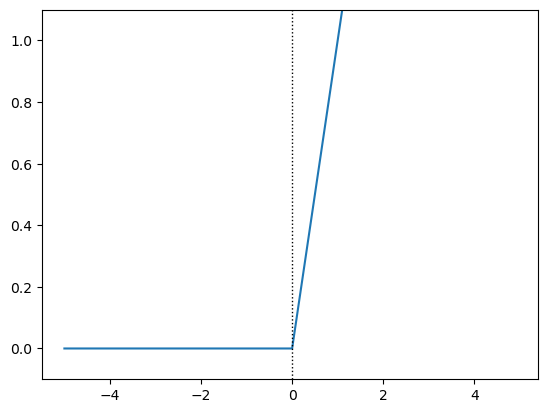

In [26]:
x = np.arange(-5.0, 5.0, 0.1)
y = ReLU(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.axvline(x=0, color='black', linestyle=':', linewidth=1)
plt.show()

# Perceptron with Iris

Data Load & Train_Test 분리

In [27]:
import numpy as np
import pandas as pd
import random

from sklearn.datasets import load_iris
from sklearn.base import BaseEstimator, ClassifierMixin  
# BaseEstimator : get_params & set_params 등 하이퍼 파라미터 튜닝에 필요한 함수를 상속받을 수 있음
# ClassifierMixin : 모델 성능 평가에 사용되는 score() 함수를 상속받을 수 있음 

In [28]:
iris_data = load_iris()

iris_dataset = np.column_stack((iris_data.data, iris_data.target))
iris_dataset = list(iris_dataset)
# random seed 설정
random.shuffle(iris_dataset)

def seperate_dataset():
    part_A_train = iris_dataset[0:40]
    part_A_test = iris_dataset[40:50]
    part_B_train = iris_dataset[50:90]
    part_B_test = iris_dataset[90:100]
    part_C_train = iris_dataset[100:140]
    part_C_test = iris_dataset[140:150]
    train = np.concatenate((part_A_train, part_B_train, part_C_train))
    test = np.concatenate((part_A_test, part_B_test, part_C_test))

    return train, test

train, test = seperate_dataset()

In [29]:
x_train = np.array([i[:4] for i in train])
y_train = np.array([i[4] for i in train])
x_test = np.array([i[:4] for i in test])
y_test = np.array([i[4] for i in test])

모델 만들기

In [30]:
class MLP(BaseEstimator, ClassifierMixin):
    
    def __init__(self): # __init__ : 클래스를 만들 때, 공통적으로 만들어서 쓰겠다는 함수 
        self.input_layer = 4          # input layer
        self.hidden_layer = 5         # hidden layer
        self.output_layer = 3         # output layer
        self.learning_rate = 0.001    # learning rate
        self.max_epochs = 100         # 최대 학습횟수
        self.bias_hidden_value = -1   
        self.bias_output_value = -1

        self.w_hidden = [[2*random.random()-1 for i in range(self.hidden_layer)] for j in range(self.input_layer)]
        self.w_output = [[2*random.random()-1 for i in range(self.output_layer)] for j in range(self.hidden_layer)]

        self.bias_hidden = np.array([self.bias_hidden_value for i in range(self.hidden_layer)])
        self.bias_output = np.array([self.bias_output_value for i in range(self.output_layer)])

        self.n_class = 3


    def activation_func(self, x): # 활성화 함수
        ## sigmoid
        return 1 / (1 + np.exp(-x))    
        ## tanh
        # return (np.exp(x)-np.exp(-x)) / (np.exp(x) + np.exp(-x))
        ## ReLU
        if x > 0:
            return
        else:
            return 0 
        ## Leaky ReLU
        # return np.maximun(0.01 * x, x)


    def derivation_func(self, x): # 미분함수 
        ## sigmoid
        return x * (1-x)
        ## tanh

        ## ReLU

        ## Leaky ReLU



    def backpropagation(self, x): # 역전파 
        D_output = []
        erro_output = self.output - self.output_l2
        D_output = -1 * erro_output * self.derivation_func(self.output_l2)

        for i in range(self.hidden_layer):
            for j in range(self.output_layer):
                self.w_output[i][j] -= self.learning_rate * (D_output[j] * self.output_l1[i])
                self.bias_output[j] -= self.learning_rate * D_output[j]
        
        D_hidden = np.matmul(self.w_output, D_output) * self.derivation_func(self.output_l1)

        for i in range(self.output_layer):
            for j in range(self.hidden_layer):
                self.w_hidden[i][j] -= self.learning_rate * (D_hidden[j] * x[i])
                self.bias_hidden[j] -= self.learning_rate * D_hidden[j]


    def fit(self, x, y): # 학습
        total_error = 0
        n = len(x)

        for epoch in range(self.max_epochs):
            for (idx, inputs) in enumerate(x):
                self.output = np.zeros(self.n_class)
                self.output_l1 = self.activation_func(np.dot(inputs, self.w_hidden))
                self.output_l2 = self.activation_func(np.dot(self.output_l1, self.w_output) + self.bias_output.T)
                if y[idx] == 0:
                    self.output = np.array([1, 0, 0])
                elif y[idx] == 1:
                    self.output = np.array([0, 1, 0])
                elif y[idx] == 2:
                    self.output = np.array([0, 0, 1])
                
                square_error = 0
                for i in range(self.output_layer):
                    erro = (self.output[i] - self.output_l2[i]) ** 2
                    square_error = square_error + erro ** 0.5
                    total_error = total_error + square_error
                self.backpropagation(inputs)

            total_error = total_error / n
            print(f'[Epoch {epoch+1}] Total_error : {total_error}')           


    def predict(self, x, y): # 예측
        forecasts = []
        forward = self.activation_func(np.matmul(x, self.w_hidden) + self.bias_hidden)
        forward = np.matmul(forward, self.w_output) + self.bias_output

        for i in forward:
            forecasts.append(max(enumerate(i), key = lambda x : x[1])[0])
        
        array_score = []
        for i in range(len(forecasts)):
            if forecasts[i] == 0:
                array_score.append([i, 'Iris-setosa', forecasts[i], y[i]])
            elif forecasts[i] == 1:
                array_score.append([i, 'Iris-versicolour', forecasts[i], y[i]])
            elif forecasts[i] == 2:
                array_score.append([i, 'Iris-virginica', forecasts[i], y[i]])
        dataframe = pd.DataFrame(array_score, columns = ['id', 'class', 'model', 'target'])

        return forecasts, dataframe

In [31]:
mlp = MLP()
mlp.fit(x_train, y_train)

forecast, df = mlp.predict(x_test, y_test)

[Epoch 1] Total_error : 0.09655028125928303
[Epoch 2] Total_error : 0.0961270713407932
[Epoch 3] Total_error : 0.09470424237379065
[Epoch 4] Total_error : 0.09310224243978804
[Epoch 5] Total_error : 0.09132274655809228
[Epoch 6] Total_error : 0.08939371675392724
[Epoch 7] Total_error : 0.08738707220996678
[Epoch 8] Total_error : 0.08540970813733971
[Epoch 9] Total_error : 0.08357129083727721
[Epoch 10] Total_error : 0.08194859831080989
[Epoch 11] Total_error : 0.08057072380512352
[Epoch 12] Total_error : 0.07942802478703472
[Epoch 13] Total_error : 0.07849026819606099
[Epoch 14] Total_error : 0.07772145654334318
[Epoch 15] Total_error : 0.07708791690933284
[Epoch 16] Total_error : 0.07656131795024593
[Epoch 17] Total_error : 0.07611902051482301
[Epoch 18] Total_error : 0.07574336848234424
[Epoch 19] Total_error : 0.07542072154238025
[Epoch 20] Total_error : 0.07514055331704521
[Epoch 21] Total_error : 0.07489471090519598
[Epoch 22] Total_error : 0.07467684011747307
[Epoch 23] Total_err